<a href="https://colab.research.google.com/github/pickle-lotus0976/Learning/blob/main/PyTorch%20Notebooks/Fashion_MNIST_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# Import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

In [80]:
# Set random seeds for reprodcibilty
torch.manual_seed(42)

In [81]:
# Check GPU availibility
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device}')

Using cuda


In [82]:
df = pd.read_csv("/content/fashion-mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


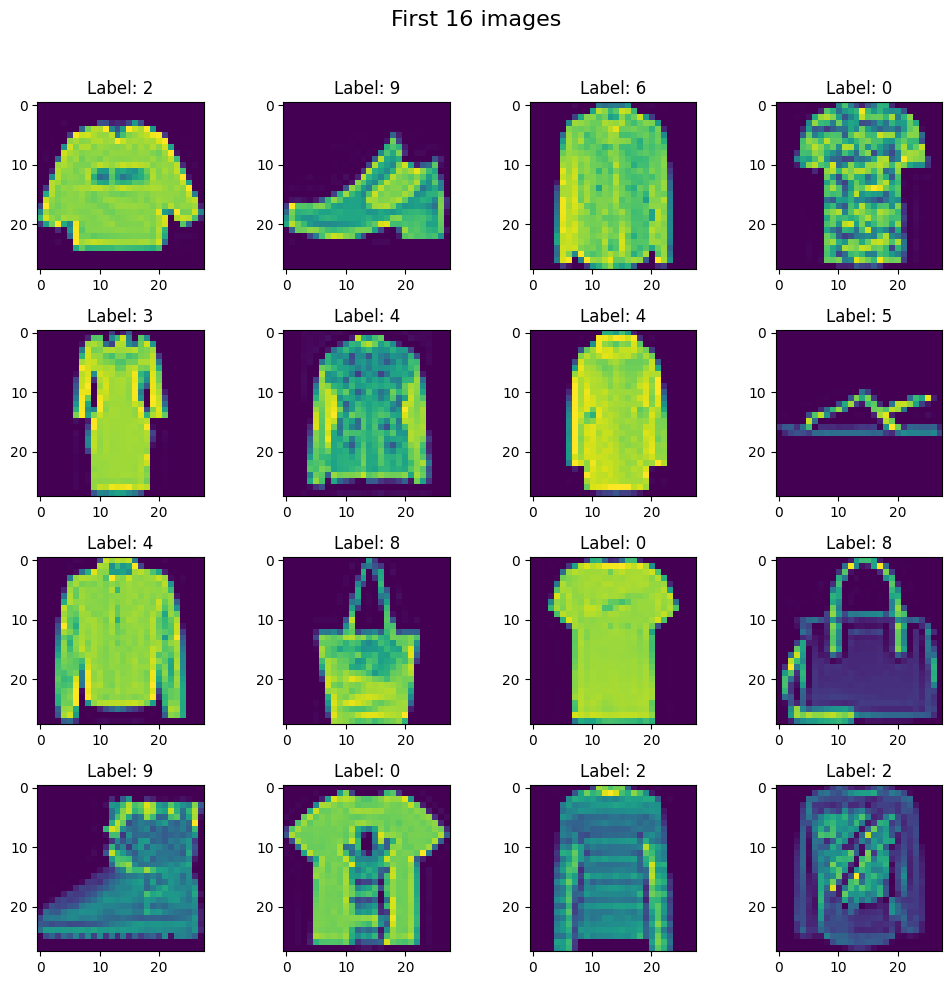

In [83]:
# Create 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
  img = df.iloc[i, 1:].values.reshape(28, 28)
  ax.imshow(img)
  ax.set_title(f"Label: {df.iloc[i, 0]}")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [84]:
# train test split
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Scaling the features
X_train = X_train / 255.0
X_test = X_test / 255.0

In [87]:
# Create your Dataset class
class CustomDataset(Dataset):
  def __init__(self, features, labels) -> None:
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [88]:
# Training dataset
train_dataset = CustomDataset(X_train, y_train)

In [89]:
# Testing dataset
test_datset = CustomDataset(X_test, y_test)

In [90]:
# Load Training and Testing datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_datset, batch_size=64, shuffle=False, pin_memory=True)

In [91]:
# Define your model
class MyNN(nn.Module):
  def __init__(self, num_features) -> None:
    super().__init__()

    # Define all the layers of your network
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

# Forward Propagation
  def forward(self, x):
    return self.model(x)

In [92]:
# Set epoch and learning rate
epochs = 100
learning_rate = 0.1

In [93]:
# Instantiate your model
model = MyNN(X_train.shape[1])

# Transport it to GPU
model = model.to(device)

# Define your loss function
criterion = nn.CrossEntropyLoss()

# Choose your optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [94]:
# Training loop
for epoch in range(epochs):
  total_epoch_loss = 0.0
  for batch_features, batch_labels in train_loader:

    # Move data to GPU for training
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # Make your predictions
    outputs = model(batch_features)

    # Calculate loss
    loss = criterion(outputs, batch_labels)

    # Clear the gradients
    optimizer.zero_grad()

    # Apply backward propagation
    loss.backward()

    # Update your parameters
    optimizer.step()

    total_epoch_loss += loss.item()

  avg_loss = total_epoch_loss / len(train_loader)
  print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}")

Epoch [1/100], Loss: 0.7391
Epoch [2/100], Loss: 0.4667
Epoch [3/100], Loss: 0.4129
Epoch [4/100], Loss: 0.3827
Epoch [5/100], Loss: 0.3608
Epoch [6/100], Loss: 0.3445
Epoch [7/100], Loss: 0.3285
Epoch [8/100], Loss: 0.3178
Epoch [9/100], Loss: 0.3064
Epoch [10/100], Loss: 0.2954
Epoch [11/100], Loss: 0.2866
Epoch [12/100], Loss: 0.2790
Epoch [13/100], Loss: 0.2702
Epoch [14/100], Loss: 0.2628
Epoch [15/100], Loss: 0.2575
Epoch [16/100], Loss: 0.2496
Epoch [17/100], Loss: 0.2445
Epoch [18/100], Loss: 0.2403
Epoch [19/100], Loss: 0.2320
Epoch [20/100], Loss: 0.2276
Epoch [21/100], Loss: 0.2225
Epoch [22/100], Loss: 0.2160
Epoch [23/100], Loss: 0.2127
Epoch [24/100], Loss: 0.2079
Epoch [25/100], Loss: 0.2021
Epoch [26/100], Loss: 0.1998
Epoch [27/100], Loss: 0.1957
Epoch [28/100], Loss: 0.1899
Epoch [29/100], Loss: 0.1859
Epoch [30/100], Loss: 0.1843
Epoch [31/100], Loss: 0.1825
Epoch [32/100], Loss: 0.1776
Epoch [33/100], Loss: 0.1731
Epoch [34/100], Loss: 0.1680
Epoch [35/100], Loss: 0

In [95]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [96]:
total = 0
correct = 0
with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    # Move data to GPU for training
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
    outputs = model(batch_features)

    # Extract the labels from the probability scores (outputs)
    _, predicted_label = torch.max(outputs, 1)

    # Calclulate total number of labels
    total += batch_labels.shape[0]

    # Calculate the number of correct labels
    correct = correct + (predicted_label == batch_labels).sum().item()
print(correct / total)

0.8914166666666666
